<h1><center>cs1001.py , Tel Aviv University, Fall 2019/20</center></h1>
<img src="http://www.pngall.com/wp-content/uploads/2016/05/Python-Logo-PNG-Image-180x180.png" width=50/>

## Exam recitation

We went over various questions from previous exams

###### Takeaways:
- The exam is easy, all you have to do is write down the correct answers
- When in doubt, bet on 42

#### Code for printing several outputs in one cell (not part of the recitation):

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 2017AA2: Profit

Given $n$ and a list of integers $values$ of length $n$, we we will think of a landlord that has an apartment of size $n$ squared meters. The landlord can divide his apartment into smaller subapartments and an apartment of size $k \leq n$ will yield a rent of $value[k-1]$ dollars.

E.g., for $n = 4, values=[1,5,8,9]$ we can have:
- One apartment of size $4$ renting at $9$ dollars
- Two apartments of size $1$ and one of size $2$ renting at $1+1+5=7$ dollars
- And so on...

Our goal is to find a partition which maximizes the landlords profit. Our solution needs to be recursive and **use no loops**.

The idea:
- If we don't have any space, or we don't have any partitions available, we make 0 dollars
- If we have 1 meter, we make $value[0]$
- Otherwise, say the length of $len(value)$ is $i$:
    - If we make an apartment of size $i$, i.e. $i \leq size$ then we profit $value[i-1]$ and we need to recursively split $size - i$ meters
    - Otherwise, we do not split to appartments of size $i$, and may only split to appartments of smaller size (at most $i-1$), so we bound the region of interest to $i-1$ and we still need to recursively split $size$
- We compute both of the above and take the max between them

In [ ]:
def profit(value, size):
    n = len(value)
    return profit_rec(value, n, size)

def profit_rec(value, i, size):
    if size == 0 or i == 0:
        return 0
    if size == 1:
        return value[0]
    
    with_i = 0
    if i <= size:
        with_i = profit_rec(value, i, size - i)+value[i-1]
        
    without_i = profit_rec(value, i - 1, size)
    return max(with_i, without_i)

profit([1, 5, 8, 9], 4)
profit([2, 3, 7, 8, 9], 5)
    

### 2017AA3: What

The following function $what$ is given two sorted lists $A,B$ as its input.



In [3]:
def what(A, B):
    mina = 0
    minb = 0
    k = (len(A) + len(B)) // 2
    while k > 0:
        m = (k-1)//2
        if mina+m >= len(A):
            minb = minb + (m+1)
        elif minb+m >= len(B):
            mina = mina + (m+1)
        else:
            if A[mina + m] <= B[minb + m]:
                mina = mina + (m+1)
            else:
                minb = minb + (m+1)
        k = k - (m+1)
    print (mina, minb)
    if len(A) == mina:
        return B[minb]
    if len(B) == minb:
        return A[mina]
    return min(A[mina], B[minb])


In [4]:
x = what([1,2,4,5,8], [])
print(x)

2 0
4


In [5]:
y = what([1, 2, 4, 5, 8], [4, 7, 9, 10])
print(y)

3 1
5


<b>Question: </b>

Let $n_1, n_2$ denote the length of A,B, respectively. What is the time complexity of the function $what$ as a function of $n_1, n_2$?


<b>Answer: </b>

Note that we can answer this question without understanding what the function does.

The number of iterations depends on the value $k$, which is initially set to $\frac{n_1 + n_2}{2}$.
In the beginning of each iteration we compute $m$ to be $(k-1)//2$, and in the end of each iteration we update $k$ to be: $k-((k-1)//2 +1)=(k-1)//2$. That is, $k$ is reduced by half.

After roughly  $log(\frac{n_1 + n_2}{2})$ iterations $k$ becomes 0.

Note that each iterations takes $O(1)$ time (we assume here that arithmetic operations take constant time).

Therefore, overall the time complexity of the function is $O(log(n_1 + n_2))$.


<b>Explaining what this function does:</b>

The function returns the median of the values in the two lists.

Half of the values in the two lists are smaller or equal to the median and the other half are greater than the median.

The function will compute indices $mina, minb$, such that in the end $mina + minb = (n_1 + n_2)//2$. $mina$ will be the rightmost index in $A$ of a value smaller or equal to the median.
$minb$ will be the leftmost index in $B$ of a value greater than the median. or vice verca.

For example:

    A = [1,  2,  4,  5,  8] 
    B = [4,  7,  9,  10]
    mina = 3
    minb = 1


    A = [1,  2,  4,  5,  8] 
    B = []
    mina = 2
    minb = 0

We will find $mina, minb$ using the following method:

Let $n = n_1 + n_2$. 
We describe the first iteration in this loop.
Consider the first $n/4 -1$ elements in both lists. 
There are two options: 
- Either the median is not part of these $2(n/4 -1)$  elements
    A = [1,  2,  4,  5,  8] , 
    B = [4,  7,  9,  10] , 
    median = 5

- or it resides in the first $n/4 -1$ elements of one of the lists.
    A = [1,  2,  2,  3,  8],  
    B = [4,  7,  9,  10], 
    median = 4
    
In any case, $n/4-1$ elements can be discarded as candidates for the median.
In other words we will increase $mina$ or $minb$ by $n/4$.

In the next iteration we discard $m = n/8$ candidates.

At each iteration of the loop, we are $2m$ items away from the median where the $2m$ items are dispered among $A$ (from $mina$ onwards) and $B$ (from $minb$ onwards) together. When updating $mina,minb$ there are several scenarios:
- If  $mina+m >= len(A)$ then there are less than $m$ items to the right of $mina$ in $A$. Since we are $2m$ items away from the median, we can discard at least $m$ items from $B$ (i.e., $minb += m$). 
- Likewise, if  $minb+m >= len(B)$ then there are less than $m$ items to the right of $minb$ in $B$. Again, we can now discard $m$ items from $A$ ($mina += m$).
- Otherwise, there are at least $m$ elements to the right of $mina,minb$ in both lists. In this case we would like to discard the smaller $m$ elements. Therefore we compare the last element in the two subsets of size $m$. If the value in $A$ is smaller or equal to the one in $B$ then we discard the candidates from $A$ (increase $mina$). Otherwise, we discard candidates from $B$.











## 2018BA3: Max repeating substring

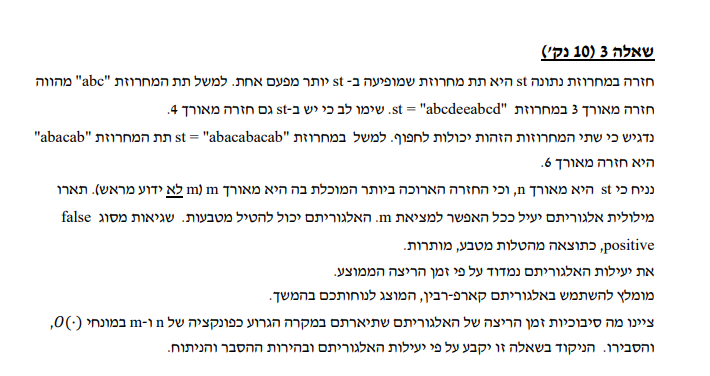

"The algorithm can toss coins, and there could be false positive errors due to coin tossing" means that the algorithm may include some randomness that could possibly affect the number of false positives. As in Karp Rabin and the choice of $r$.




A bad solution:


try all values of $m$ between $1$ and $n$, and for each value $i$ compute the list of fingerprints of all substrings of length $i$ in $st$ (Using text_fingerprints function). The length of the list is $n-i$ and it contains values of constant size (numbers between 0 and r-1). Running test_fingerprints takes $O(n)$ time. Then, we create a set from this list, and test whether the size of the set is equal to the length of the list. 

The expected time complexity of creating the set is $O(n-i)$. If the list and set are of the same size then there are no repetitions. So we stop and return $i-1$. Overall for each $i$ the expected time complexity is $O(n)$. Complexity is expected $\Sigma_{i=1}^{m+1}{n} = O(mn)$.


A better solution:

We can use binary search for finding the correct value of $1\leq m\leq n$ and obtain a better solution. For each tested value $i$, as before, we test in expected $O(n)$ time whether there are repetitions of length $i$ in the input string. If there are no repetitions of length $i$, we know that $m<i$. Otherwise, $m>i$. In any case we can discard half of the candidate values for $m$.
Expected time complexity is $O(n \log n)$.

We can even do better (what happens if $m \ll n$?)

We can search for $m$ in $O(\log m)$ time. Start with $i=1$, and double its value as long as we find repetitions of size $i$. As soon as we reach $i$ with no repeating substring of length $i$, we know that $i/2 \leq m < i$. Now we can binary search for $m$ within this range.
Note that $i\leq 2m$. Therefore, we perform $O(\log m)$ steps.
Overall expected complexity is $O( n\log m)$



## 2018BB3: order_rec


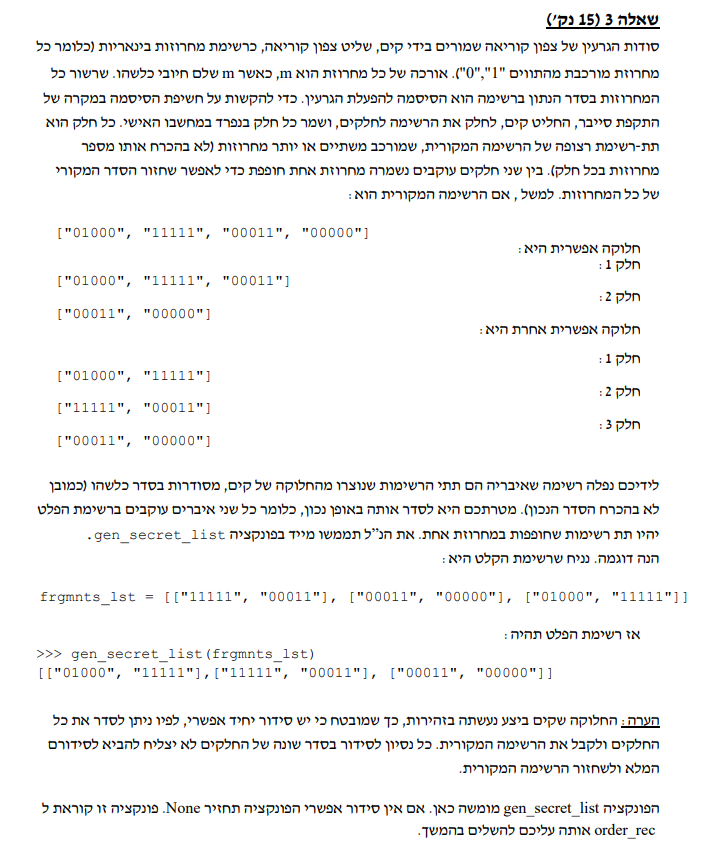


In [ ]:

#Our solution here:









def gen_secret_list(frgmnts_lst):
    n = len(frgmnts_lst) #number of fragments
    ordered_frgmnts_lst = order_rec([], frgmnts_lst)
    return ordered_frgmnts_lst

def order_rec(ordered_so_far_lst, remaining_lst):
    if len(remaining_lst) == 0:
        return ordered_so_far_lst
    for i, frg in enumerate(remaining_lst):
        if ordered_so_far_lst == [] or \
         frg[0] == ordered_so_far_lst[-1][-1]:
           
            ordered_so_far_with_frg = ordered_so_far_lst + [frg]
            remaining_without_frg = remaining_lst[:i] + \
                                    remaining_lst[i+1:]
            
            res = order_rec(ordered_so_far_with_frg, \
                            remaining_without_frg)
            
            if res != None:
                return res
    return None


In [ ]:
frgmnts_lst = [["11111", "00011"], ["00011", "00000"], ["01000", "11111"]]
res = gen_secret_list(frgmnts_lst)
print(res)

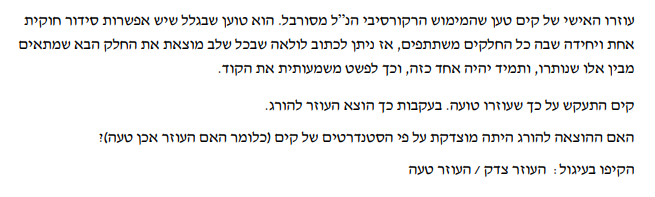


Answer:

The assistant was wrong. A greedy algorithm may not work properly here. The fact there is only one valid arrangement for all fragments, does not mean that at any step there is only one possible candidate.

example:

    [[a,b],[b,c],[c,e],[e,c],[c,d]]
    here there are two fragments that can be placed after [[a,b],[b,c]], but only one of them allows for a valid arrangement.





## 2019AA3: inversions

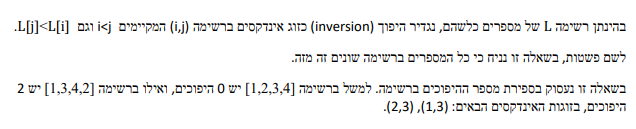





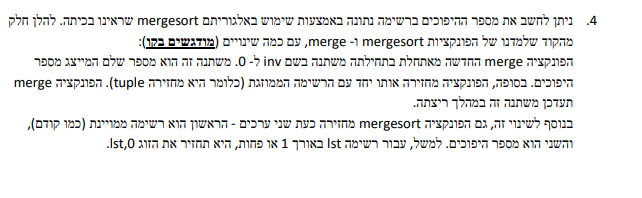

We are requested to update $merge$ and $mergesort$ functions such that running $mergesort$ on a given list will return  a pair: (the sorted list, the number of inversions in the list)

In [6]:
def mergesort(lst):
    n = len(lst)
    if n<=1:
        return lst,0
    else:
        L1, inv1 = mergesort(lst[0:n//2])
        L2, inv2 = mergesort(lst[n//2:])
        L, inv3 = merge(L1,L2)
        return L, (inv1+inv2+inv3)

def merge(A,B):
    inv = 0
    n = len(A)
    m = len(B)
    C = [0 for i in range(n+m)]
    
    a = 0; b = 0; c = 0
    while a<n and b<m:
        if A[a] < B[b]:
            C[c] = A[a]
            a+=1
        else:
            C[c] = B[b]
            b+=1
            inv+=n-a
        c+=1
    C[c:] = A[a:] + B[b:]
    return C,inv
    


In [ ]:
print( mergesort([1,2,3,4]))
print( mergesort([1,3,4,2]))
print( mergesort([4,3,2,1]))

Time Complexity is still $(n\log n)$, since $merge$ is still linear in the size of the two lists.

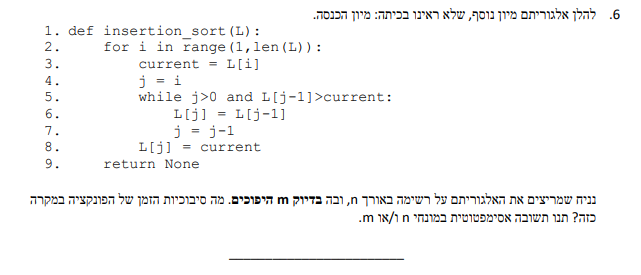

Note the loop invariant - after the $i$th loop concludes, all items in $L[0,i]$ are sorted. We now take the $i+1$th item, and sift it down to its proper location. We do this sifting until we reach an item smaller than $L[i+1]$, so each sift counts for one inversion of the $i+1$th item, and we count all of them.

Let $m_i$ be the number of inversions of the $i$th item relative to those left of him (that is, elements left of $i+1$ that are bigger than him). The while loop performs $m_i$ operation in the $i$th iteration of the for loop, so a total of $O(\sum m_i) = O(m)$ operations. Apart from the while loop, each iteration of the for loop takes $O(1)$ time, so the total is $O(n+m)$ 


## 2018AA5: Rotating trees

Given two BSTs $T,S$ we say that $T$ and $S$ are equivalent if they are the same up to a sequence of switching between left and right sons of some of the nodes in the trees. 

The following trees are equivalent:

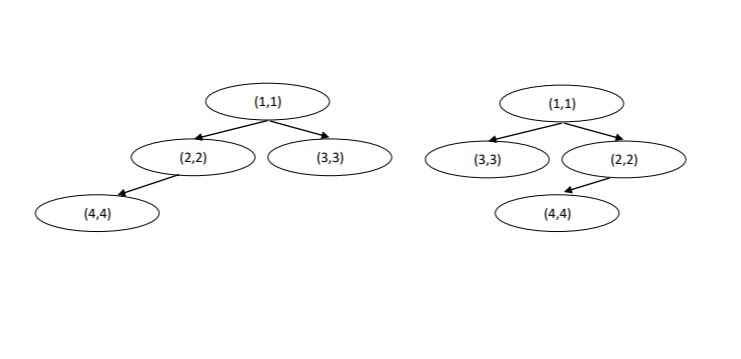



But they are not equivalent to this tree:

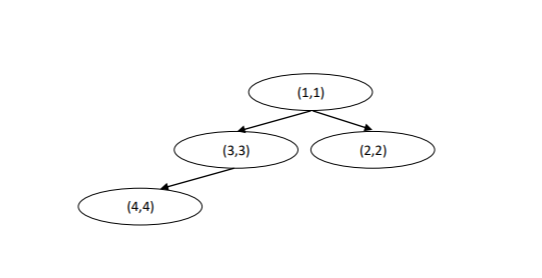

Implement $equiv(r1, r2)$ which gets two root nodes $r1, r2$ and return $True$ iff they represent roots of equivalent trees. The function should be recursive.

The idea is:
- Two leaves are equivalent if their key and value are equivalent
- Two trees are equivalent if:
    - Their roots agree on their keys and values
    - Their left sons $L1, L2$ and right sons $R1,R2$ are equivalent, or $L1, R2$ and $L2, R1$ are equivlanet

In [ ]:
class Tree_node():
    def __init__(self, key, val):
        self.key = key
        self.val = val
        self.left = None
        self.right = None

    def __repr__(self):
        return "(" + str(self.key) + ":" + str(self.val) + ")"

    def __eq__(self,other):
        if other==None:
            return False
        if self.key==other.key and self.val==other.val:
            return True
        else:
            return False    
        
class Binary_search_tree():

    def __init__(self):
        self.root = None


    def __repr__(self): #no need to understand the implementation of this one
        out = ""
        for row in printree(self.root): #need printree.py file
            out = out + row + "\n"
        return out


    def lookup(self, key):
        ''' return node with key, uses recursion '''

        def lookup_rec(node, key):
            if node == None:
                return None
            elif key == node.key:
                return node
            elif key < node.key:
                return lookup_rec(node.left, key)
            else:
                return lookup_rec(node.right, key)

        return lookup_rec(self.root, key)



    def insert(self, key, val):
        ''' insert node with key,val into tree, uses recursion '''

        def insert_rec(node, key, val):
            if key == node.key:
                node.val = val     # update the val for this key
            elif key < node.key:
                if node.left == None:
                    node.left = Tree_node(key, val)
                else:
                    insert_rec(node.left, key, val)
            else: #key > node.key:
                if node.right == None:
                    node.right = Tree_node(key, val)
                else:
                    insert_rec(node.right, key, val)
            return
        
        if self.root == None: #empty tree
            self.root = Tree_node(key, val)
        else:
            insert_rec(self.root, key, val)

def equiv(node1, node2):
    if node1 == node2 == None:
        return True
    if node1 == None or node2 == None or node1 != node2:
        return False
    no_switch = equiv(node1.left, node2.left) and equiv(node1.right, node2.right)
    switch = equiv(node1.left, node2.right) and equiv(node1.right, node2.left)
    return switch or no_switch

### Testing

In [ ]:
T1 = Binary_search_tree()
T1.insert(1,1)
T1.root.left = Tree_node(2,2)
T1.root.right = Tree_node(3,3)
T1.root.left.left = Tree_node(4,4)

T2 = Binary_search_tree()
T2.insert(1,1)
T2.root.left = Tree_node(3,3)
T2.root.right = Tree_node(2,2)
T2.root.right.left = Tree_node(4,4)

T3 = Binary_search_tree()
T3.insert(1,1)
T3.root.left = Tree_node(3,3)
T3.root.right = Tree_node(2,2)
T3.root.left.left = Tree_node(4,4)

equiv(T1.root,T2.root)
equiv(T1.root,T3.root)
#k = Tree_node(1,1)
#p = Tree_node(1,1)
#k == p

Can memoization help? Not really, since subtrees can be disjoint, we will never reach a tree we've already examined.

Next, given two roots of $T1,T2$ determine if there exists a non-empty subtree of $T1$ equivalent to a subtree of $T2$.

The idea
- If the two roots are equivalent (and not empty) we are done
- If one of the roots is $None$, we are done
- Otherwise:
    - There may be a subtree of $T2$ equivalent to $T1$
    - Or a subtree of $T1$ equivalent to $T2$

In [ ]:
def subequiv(node1, node2):
    if equiv(node1, node2) and node1 != None:
        return True
    if node1 == None or node2 == None:
        return False
    t1_stays = subequiv(node1, node2.left) or subequiv(node1, node2.right)
    t2_stays = subequiv(node1.left, node2) or subequiv(node1.right, node2)
    return t1_stays or t2_stays

In [ ]:
subequiv(T1.root,T2.root)
T4 = Binary_search_tree()
T4.insert(100,100)
T4.root.left = T2.root
subequiv(T4.root, T2.root)

# Since they share leaves
subequiv(T2.root, T3.root)


## 2017AB2: Jump

Given a list $lst$ of $n$ integers where $lst[0]=0$ we want to get to $lst[n-1]$ by jumping to the right (i.e. - advancing in the list). 

We init a counter $cnt=0$ and if we add $lst[i]$ to the counter for every index $i$ we visit.

Implement $jump$ which gets a list as described above and returns the minimal total penalty.

The idea: We must visit $lst[-1]$ and we should visit any index $i$ s.t. $lst[i] < 0$.

In [ ]:
def jump(lst):
    # Note the range!
    return lst[-1] + sum(lst[i] for i in range(len(lst)-1) if lst[i] < 0)

jump([0,4,5,1,2,-3,-5])

jump([0,4,5,1,2,-3,2])

Jump limited - we now get a parameter $max\_jump$ and we can now advance only $1 \leq i \leq max\_jump$ steps in each move.

Implement $jump\_rec$ without splicing.

In [ ]:
def jump_lim(lst, max_jump):
    return jump_rec(lst, max_jump, 0)

def jump_rec(lst, max_jump, ind):
    if ind == len(lst) - 1:
        return lst[ind]
    cnt = float("inf")
    for j in range(1, max_jump + 1):
        if ind+j < len(lst):
            res = jump_rec(lst, max_jump, ind+j) + lst[ind]
        if res < cnt:
            cnt = res
    return cnt
        
jump_lim([0,4,5,1,2,-3,2], 100)
jump_lim([0, 2, 2, 0, 4], 3)

Add memoization:

In [ ]:
def jump_lim(lst, max_jump):
    d = {}
    return jump_rec_mem(lst, max_jump, 0, d)

def jump_rec_mem(lst, max_jump, ind, d):
    if ind == len(lst) - 1:
        return lst[ind]
    if ind in d:
        return d[ind]
    
    cnt = float("inf")
    for j in range(1, max_jump + 1):
        if ind+j < len(lst):
            res = jump_rec_mem(lst, max_jump, ind+j, d) + lst[ind]
        if res < cnt:
            cnt = res
    d[ind] = cnt
    return cnt
        
jump_lim([0,4,5,1,2,-3,2], 100)
jump_lim([0, 2, 2, 0, 4], 3)

## 2019AB2: Matching strings
Given a list of strings $strlst$ and a string $word$ we say we can construct $word$ from $strlst$ if we can pick at most 1 char from each string in the list that yield $word$.

For example, we can construct "Raz" from $["abc", "FOR", "buzz"]$ and also from $["abc", "FOR", "aaa", "buzz", "hello"]$ but not from $["az", "FOR", "jkl"]$

Implement the recursive $construct\_rec$. The idea is that we maintain an index $j$ s.t. we need to construct $word[j:]$ from the list of strings.
- If $j==len(word)$ we are done.
- Otherwise, we go over the list, for each string we check if it contains $word[j]$ and if so we recurse on $j+1$ and ommit that string from the list
- If we exit the loop without success, we return $False$

In [ ]:
def construct(str_list, word):
    if len(str_list) < len(word):
        return False
    return construct_rec(str_list, word, 0)

def construct_rec(str_list, word, j):
    if j == len(word):
        return True
    for i in range(len(str_list)):
        if word[j] in str_list[i]:
            if construct_rec(str_list[:i]+str_list[i+1:], word, j+1):
                return True
    return False
            
construct(["abc", "FOR", "buzz"], "Raz")    
construct(["az", "FOR", "jkl"], "Raz")    
construct(["az", "FOR", "hello","a"], "Raz")

Now we need to solve a variant where the order of the strings we take must agree with the order of characters in $word$.

E.g., now we can no longer construct "Raz" from $["abc", "FOR", "buzz"]$ but we can from $["FOR", "abc", "jkl", "buzz"]$.

The new solution should run in time $O(n)$ where $n$ is the length fo the string list.

The idea: we can now be greedy. Whenever we can take a certain string we should, because we will not be able to take it from characters later on.

In [ ]:
def construct_order(str_list, word):
    i = 0
    j = 0
    while i < len(word) and j < len(str_list):
        if word[i] in str_list[j]:
            i += 1
        j += 1
        
        if i == len(word):
            return True
        
    return False
        
            
construct_order(["abc", "FOR", "buzz"], "Raz")    
construct_order(["FOR", "abc", "buzz"], "Raz")    

